In [1]:
import pandas as pd
import scikits.bootstrap as bootstraps
import numpy as np
from matplotlib import pyplot as plt
import proplot as pplot
import cmaps
import xarray as xr
from scipy.stats import linregress
from warnings import simplefilter
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=FutureWarning)

## plot scaling factors and attributable change in subregions

In [3]:
scaling_factor_and_trends_2sig = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/scripts/attribution_Ribes/trends_scaling_factors_2signal_GPH.csv',index_col=0)
scaling_factor_and_trends_3sig = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/scripts/attribution_Ribes/trends_scaling_factors_3signal_GPH.csv',index_col=0)

scaling_factor_and_trends_3sig['trend'] = scaling_factor_and_trends_3sig['trend'] * 2
scaling_factor_and_trends_3sig['trend_min'] = scaling_factor_and_trends_3sig['trend_min'] * 2
scaling_factor_and_trends_3sig['trend_max'] = scaling_factor_and_trends_3sig['trend_max'] * 2

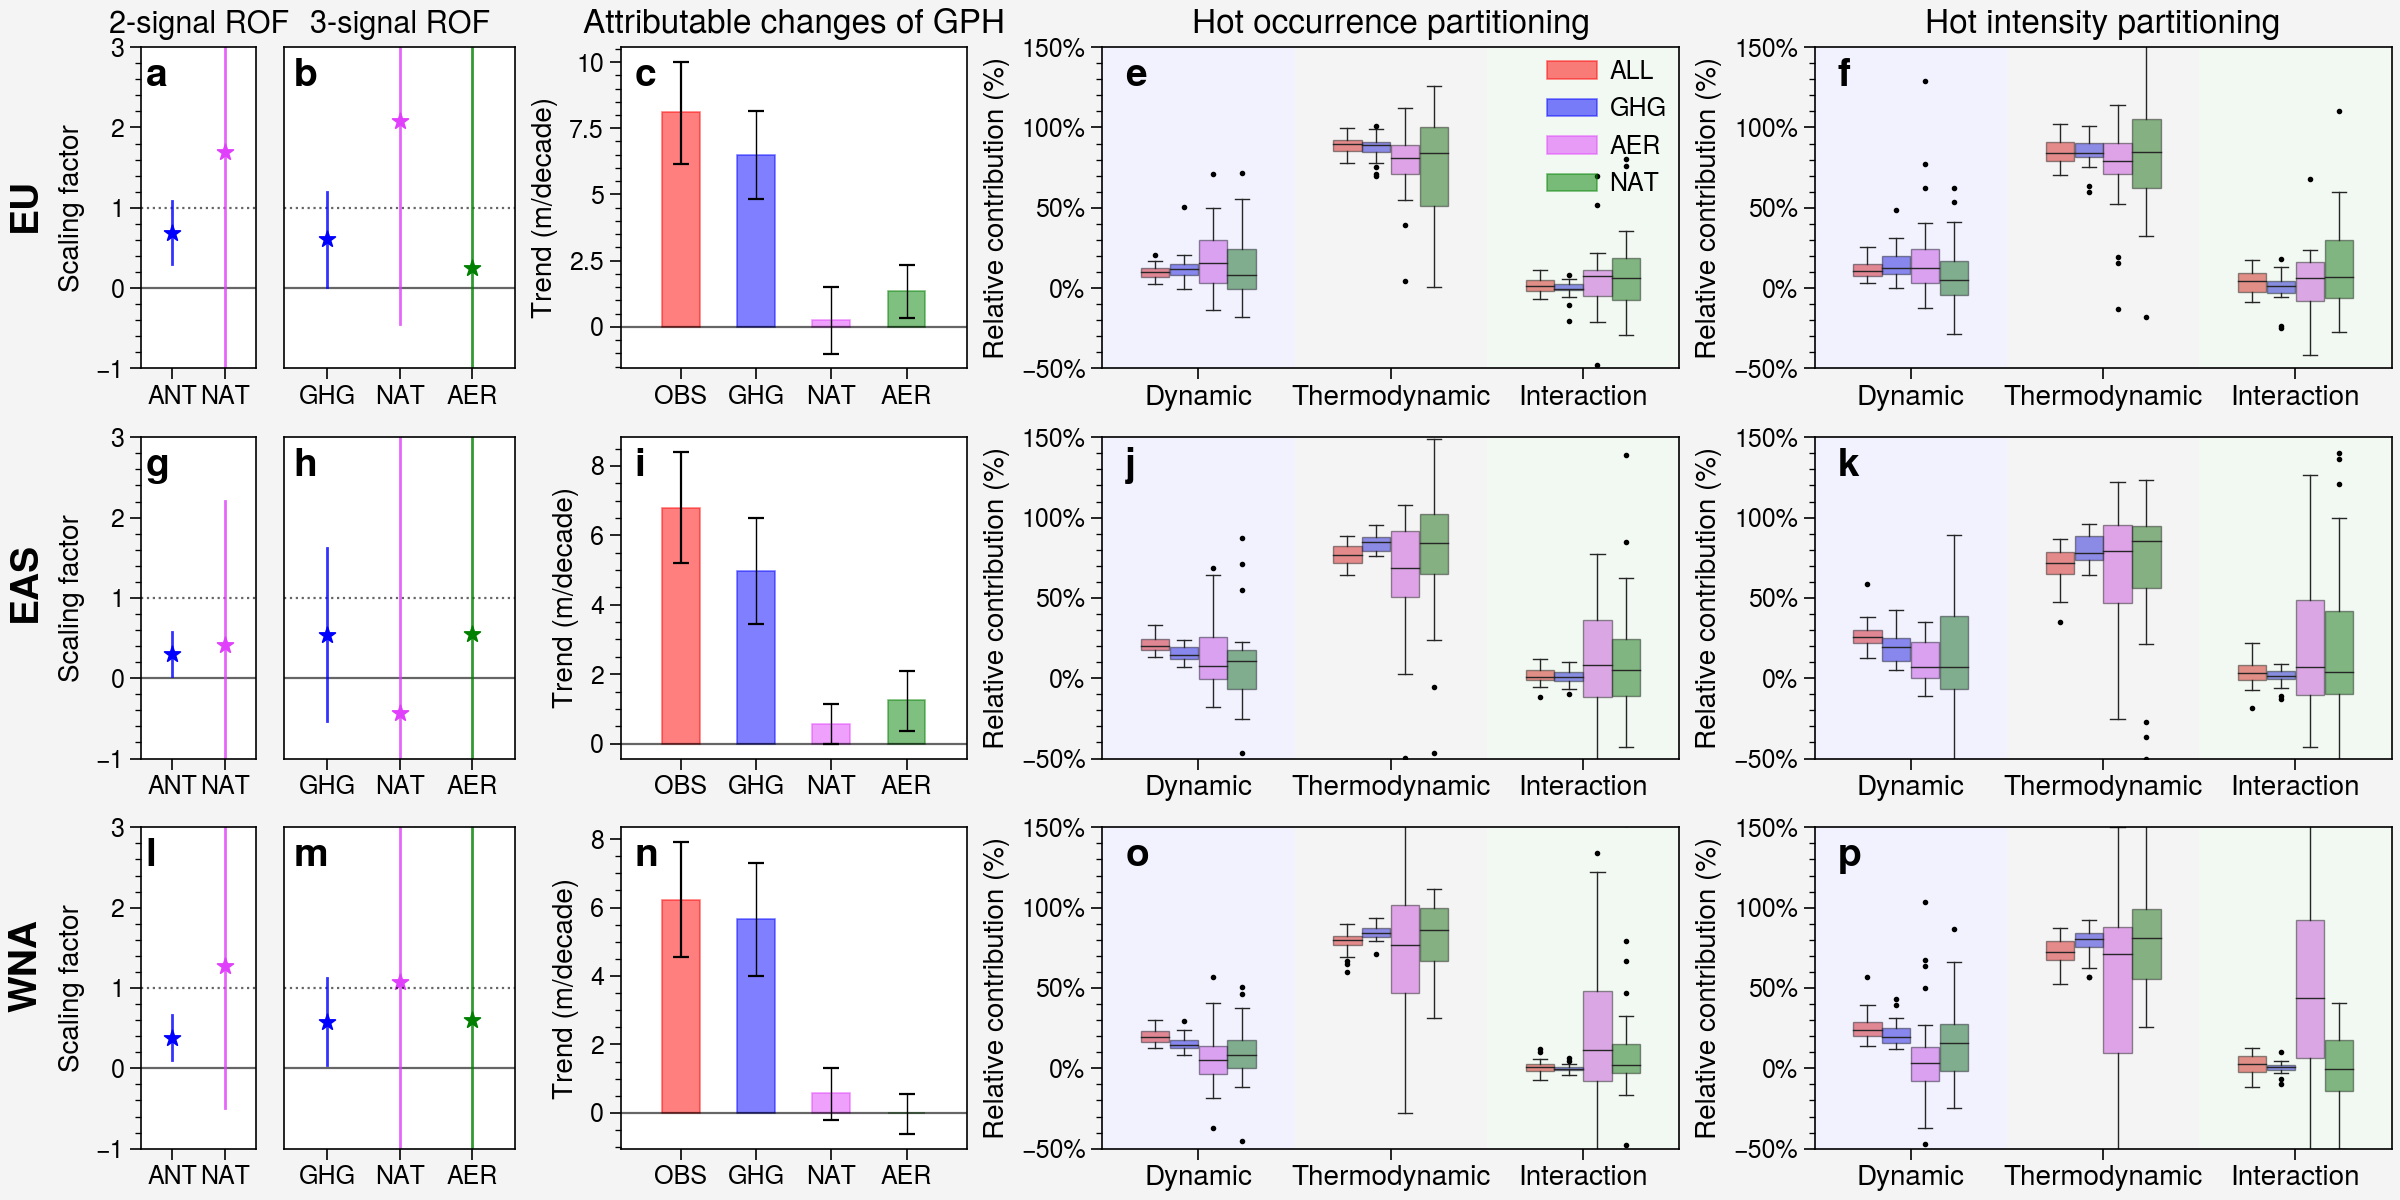

In [84]:
scaling_factor_and_trends_3sig_ribes = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/scripts/attribution_Ribes/trends_scaling_factors_Ribes_GPH.csv',index_col=0)
scaling_factor_and_trends_3sig_ribes['trend'] = scaling_factor_and_trends_3sig_ribes['trend'] * 2
scaling_factor_and_trends_3sig_ribes['trend_min'] = scaling_factor_and_trends_3sig_ribes['trend_min'] * 2
scaling_factor_and_trends_3sig_ribes['trend_max'] = scaling_factor_and_trends_3sig_ribes['trend_max'] * 2

fig, ax = plt.subplots(3, 5, sharex=False, figsize=(12,6), gridspec_kw={'width_ratios': [1,2, 3, 5, 5],'wspace': 0.001},constrained_layout=True)
pattern_num = {'Pattern 1':0,'Pattern 2':1,'Pattern 3':2,'Pattern 4':3}
regions = ['EU','EAS','WNA']
 #['#abc9ea','#efb792','#98daa7','#f3aba8']
flierprops = dict(marker='.', markerfacecolor='None', markersize=2,  markeredgecolor='black')
color_f = ['#abc9ea','#efb792','#98daa7','#f3aba8']

for r in range(len(regions)):
    marker = '*'

    domain = regions[r]
    patt_clss = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/partitioned_trends_' + domain + '_intensity.csv')
    patt_clss_occ = pd.read_csv('/Users/zeqinhuang/Documents/paper/HWdna/procData/partitioned_trends_' + domain + '_occurrence.csv')

    for obs in ['ERA5']:

        sf_df = scaling_factor_and_trends_2sig[scaling_factor_and_trends_2sig['obs_name']==obs]
        sf_df = sf_df[sf_df['domain']==domain]
        
        ax[r,0].axhline(y=0,color='black',alpha=0.6,linewidth=0.8)
        ax[r,0].axhline(y=1,linestyle=':',color='black',alpha=0.6,linewidth=0.8)
        l1 = ax[r,0].plot((1,1),(sf_df['sf_min'][sf_df['forcing']=='ANT'],sf_df['sf_max'][sf_df['forcing']=='ANT']),color=color_f[1],alpha=0.8,linewidth=1)
        ax[r,0].plot((2,2),(sf_df['sf_min'][sf_df['forcing']=='NAT'],sf_df['sf_max'][sf_df['forcing']=='NAT']),color=color_f[2],alpha=0.8,linewidth=1)
        s1 = ax[r,0].scatter(x=1,y=sf_df['sf_best'][sf_df['forcing']=='ANT'],marker=marker,color=color_f[1])
        ax[r,0].scatter(x=2,y=sf_df['sf_best'][sf_df['forcing']=='NAT'],marker=marker,color=color_f[2])
        ax[r,0].set(ylim=(-1,3))
        ax[r,0].set(xlim=(0.4,2.6))
        labels = ['','ANT','NAT','']
        ax[r,0].set_xticklabels(labels)
        ax[r,0].xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
        ax[r,0].set_ylabel('Scaling factor',fontdict={'fontsize':10})
        ax[r,0].grid(False)

        ax[r,1].axhline(y=0,color='black',alpha=0.6,linewidth=0.8)
        ax[r,1].axhline(y=1,linestyle=':',color='black',alpha=0.6,linewidth=0.8)

        sf_df2 = scaling_factor_and_trends_3sig[scaling_factor_and_trends_3sig['obs_name']==obs]
        sf_df2 = sf_df2[sf_df2['domain']==domain]
        ax[r,1].plot((2,2),(sf_df2['sf_min'][sf_df2['forcing']=='GHG'],sf_df2['sf_max'][sf_df2['forcing']=='GHG']),color=color_f[1],alpha=0.8,linewidth=1)
        ax[r,1].plot((3,3),(sf_df2['sf_min'][sf_df2['forcing']=='AER'],sf_df2['sf_max'][sf_df2['forcing']=='AER']),color=color_f[2],alpha=0.8,linewidth=1)
        ax[r,1].plot((4,4),(sf_df2['sf_min'][sf_df2['forcing']=='NAT'],sf_df2['sf_max'][sf_df2['forcing']=='NAT']),color=color_f[3],alpha=0.8,linewidth=1)
        ax[r,1].scatter(x=2,y=sf_df2['sf_best'][sf_df2['forcing']=='GHG'],marker=marker,color=color_f[1])
        ax[r,1].scatter(x=3,y=sf_df2['sf_best'][sf_df2['forcing']=='AER'],marker=marker,color=color_f[2])
        ax[r,1].scatter(x=4,y=sf_df2['sf_best'][sf_df2['forcing']=='NAT'],marker=marker,color=color_f[3])
        ax[r,1].set(ylim=(-1,3))
        ax[r,1].set(xlim=(1.4,4.6))
        ax[r,1].set_xticks([2,3,4])
        labels = ['GHG','NAT','AER']
        ax[r,1].set_xticklabels(labels)
        ax[r,1].xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
        ax[r,1].yaxis.label.set_visible(False) # set ylabel invisible
        ax[r,1].yaxis.set_visible(False) # turn off xaxis tick labels
        ax[r,1].grid(False)

        ############# ribes attribution ##############3
        sf_df2 = scaling_factor_and_trends_3sig_ribes[scaling_factor_and_trends_3sig_ribes['obs_name']==obs]
        sf_df2 = sf_df2[sf_df2['domain']==domain]
        
        err1_obs = sf_df2['trend'][sf_df2['forcing']=='Observation']-sf_df2['trend_min'][sf_df2['forcing']=='Observation']
        err2_obs = sf_df2['trend_max'][sf_df2['forcing']=='Observation']-sf_df2['trend'][sf_df2['forcing']=='Observation']
        err1_ghg = sf_df2['trend'][sf_df2['forcing']=='Forcing no 1 only']-sf_df2['trend_min'][sf_df2['forcing']=='Forcing no 1 only']
        err2_ghg = sf_df2['trend_max'][sf_df2['forcing']=='Forcing no 1 only']-sf_df2['trend'][sf_df2['forcing']=='Forcing no 1 only']
        err1_nat = sf_df2['trend'][sf_df2['forcing']=='Forcing no 2 only']-sf_df2['trend_min'][sf_df2['forcing']=='Forcing no 2 only']
        err2_nat = sf_df2['trend_max'][sf_df2['forcing']=='Forcing no 2 only']-sf_df2['trend'][sf_df2['forcing']=='Forcing no 2 only']
        err1_aer = sf_df2['trend'][sf_df2['forcing']=='Forcing no 3 only']-sf_df2['trend_min'][sf_df2['forcing']=='Forcing no 3 only']
        err2_aer = sf_df2['trend_max'][sf_df2['forcing']=='Forcing no 3 only']-sf_df2['trend'][sf_df2['forcing']=='Forcing no 3 only']
        
        ax[r,2].axhline(y=0,color='black',alpha=0.6,linewidth=0.8)
        p1 = ax[r,2].bar(1,sf_df2['trend'][sf_df2['forcing']=='Observation'],yerr=[[err1_obs.values[0]],[err2_obs.values[0]]],alpha=0.5,align='center',edgecolor=color_f[0],facecolor=color_f[0],width=0.5,error_kw=dict(lw=0.8, capsize=3, capthick=0.8))
        p2 = ax[r,2].bar(2,sf_df2['trend'][sf_df2['forcing']=='Forcing no 1 only'],yerr=[[err1_ghg.values[0]],[err2_ghg.values[0]]],alpha=0.5,align='center',edgecolor=color_f[1],facecolor=color_f[1],width=0.5,error_kw=dict(lw=0.5, capsize=3, capthick=0.8))
        p3 = ax[r,2].bar(3,sf_df2['trend'][sf_df2['forcing']=='Forcing no 2 only'],yerr=[[err1_nat.values[0]],[err2_nat.values[0]]],alpha=0.5,align='center',edgecolor=color_f[2],facecolor=color_f[2],width=0.5,error_kw=dict(lw=0.5, capsize=3, capthick=0.8))
        p4 = ax[r,2].bar(4,sf_df2['trend'][sf_df2['forcing']=='Forcing no 3 only'],yerr=[[err1_aer.values[0]],[err2_aer.values[0]]],alpha=0.5,align='center',edgecolor=color_f[3],facecolor=color_f[3],width=0.5,error_kw=dict(lw=0.5, capsize=3, capthick=0.8))
        ax[r,2].set(xlim=(0.2,4.8))
        labels = ['OBS','GHG','NAT','AER']
        ax[r,2].set_xticks([1,2,3,4])
        ax[r,2].set_xticklabels(labels,fontdict={'fontsize':9})
        ax[r,2].xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
        ax[r,2].set_ylabel('Trend (m/decade)',fontdict={'fontsize':10})
        ax[r,2].grid(False)

    ax1 = sns.boxplot(
        x='partition',y='contribution',hue='forcing',dodge=True,
        data=patt_clss_occ,order=['Dynamic','Thermodynamic','Interaction'],
        hue_order=['historical','hist-GHG','hist-aer','hist-nat'],flierprops=flierprops,
        palette=color_f,width=0.6,linewidth=0.5,ax = ax[r,3],boxprops=dict(alpha=.5))
    ax1.bar([0,1,2],[200,200,200],width=[1],color=['blue','#4E342E','green'],alpha=0.05)
    ax1.bar([0,1,2],[-100,-100,-100],width=[1],color=['blue','#4E342E','green'],alpha=0.05)
    ax1.set(ylim=(-50,150))
    ax1.set(xlim=(-0.5, 2.5))
    ax1.set_ylabel('Relative contribution (%)',fontdict={'fontsize':10})
    yticklabels = ax1.get_yticklabels()
    ax1.set_yticklabels(yticklabels,fontdict={'fontsize':9})
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    xticklabels = ax1.get_xticklabels()
    ax1.set_xticklabels(xticklabels,fontdict={'fontsize':10})
    ax1.xaxis.label.set_visible(False)
    ax1.xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
    ax1.grid(False)
    ax1.get_legend().remove()

    ax2 = sns.boxplot(
        x='partition',y='contribution',hue='forcing',dodge=True,
        data=patt_clss,order=['Dynamic','Thermodynamic','Interaction'],
        hue_order=['historical','hist-GHG','hist-aer','hist-nat'],flierprops=flierprops,
        palette=color_f,width=0.6,linewidth=0.5,ax = ax[r,4],boxprops=dict(alpha=.5))
    ax2.bar([0,1,2],[200,200,200],width=[1],color=['blue','#4E342E','green'],alpha=0.05)
    ax2.bar([0,1,2],[-100,-100,-100],width=[1],color=['blue','#4E342E','green'],alpha=0.05)
    ax2.set(ylim=(-50,150))
    # ax2.set(ylim=(-100,200))
    ax2.set(xlim=(-0.5, 2.5))
    ax2.set_ylabel('Relative contribution (%)',fontdict={'fontsize':10})
    yticklabels = ax1.get_yticklabels()
    ax2.set_yticklabels(yticklabels,fontdict={'fontsize':9})
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    xticklabels = ax2.get_xticklabels()
    ax2.set_xticklabels(xticklabels,fontdict={'fontsize':10})
    ax2.xaxis.label.set_visible(False)
    ax2.xaxis.set_tick_params(which='minor', bottom=False) # turn off xaxis minor ticks
    ax2.grid(False)
    ax2.get_legend().remove()

handles, labels = ax1.get_legend_handles_labels()
labels = ['ALL','GHG','AER','NAT'] 

legend_elements = [
    Patch(facecolor=color_f[0], edgecolor=color_f[0],label='ALL',alpha=0.5),
    Patch(facecolor=color_f[1], edgecolor=color_f[1],label='GHG',alpha=0.5),
    Patch(facecolor=color_f[2], edgecolor=color_f[2],label='AER',alpha=0.5),
    Patch(facecolor=color_f[3], edgecolor=color_f[3],label='NAT',alpha=0.5)]
handles = legend_elements
ax[0,3].legend(handles,labels,frameon=False,ncol=1,fontsize = 'medium', fancybox = True, loc='upper right') #bbox_to_anchor=[1.01,0.7],

anchor_x = 0.04
anchor_y = 0.88
ax[0,0].text(anchor_x,anchor_y,'a',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[0,0].transAxes)
ax[0,1].text(anchor_x,anchor_y,'b',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[0,1].transAxes)
ax[0,2].text(anchor_x,anchor_y,'c',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[0,2].transAxes)
ax[0,3].text(anchor_x,anchor_y,'e',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[0,3].transAxes)
ax[0,4].text(anchor_x,anchor_y,'f',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[0,4].transAxes)

ax[1,0].text(anchor_x,anchor_y,'g',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[1,0].transAxes)
ax[1,1].text(anchor_x,anchor_y,'h',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[1,1].transAxes)
ax[1,2].text(anchor_x,anchor_y,'i',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[1,2].transAxes)
ax[1,3].text(anchor_x,anchor_y,'j',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[1,3].transAxes)
ax[1,4].text(anchor_x,anchor_y,'k',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[1,4].transAxes)

ax[2,0].text(anchor_x,anchor_y,'l',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[2,0].transAxes)
ax[2,1].text(anchor_x,anchor_y,'m',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[2,1].transAxes)
ax[2,2].text(anchor_x,anchor_y,'n',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[2,2].transAxes)
ax[2,3].text(anchor_x,anchor_y,'o',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[2,3].transAxes)
ax[2,4].text(anchor_x,anchor_y,'p',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[2,4].transAxes)

ax[0,0].set_title('2-signal ROF',fontdict={'fontsize':11})
ax[0,1].set_title('3-signal ROF',fontdict={'fontsize':11})
ax[0,2].set_title('Attributable changes of GPH',fontdict={'fontsize':12})
ax[0,3].set_title('Hot occurrence partitioning',fontdict={'fontsize':12})
ax[0,4].set_title('Hot intensity partitioning',fontdict={'fontsize':12})

anchor_x = -1.15
anchor_y = 0.45
ax[0,0].text(anchor_x,anchor_y,'EU',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[0,0].transAxes,rotation=90)
ax[1,0].text(anchor_x,anchor_y,'EAS',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[1,0].transAxes,rotation=90)
ax[2,0].text(anchor_x,anchor_y,'WNA',fontdict={'fontsize':14,'weight':'bold'}, transform=ax[2,0].transAxes,rotation=90)

plt.tight_layout()
fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/HWdna_figure_res/'
fig.savefig(fig_dir+'Fig4_detection_and_attribution_of_hot_extreme.pdf')
